In [1]:
import pandas as pd


In [8]:
! pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [2]:
df=pd.read_excel('dataset/clean_column.xlsx')

In [3]:
data=df.copy()

In [4]:
data['Performance Growth']=data['Performance Growth'].round(2)

In [5]:
data

,Training Program Name,Total Training Cost,Training Budget,Total Training Duration(Days),Performance Growth
0,Communication Skills,9330,9752,54,0.42
1,Customer Service,13185,13507,70,0.43
2,Database Administration,18600,17260,26,0.36
3,Excel - Basic to Advance,11446,11683,51,0.27
4,Leadership Development,8134,8537,56,0.31
5,Project Management,18229,18966,101,0.37
6,Technical Skills,16144,16593,80,0.36


 #### Correlation between training cost and performance growth

In [5]:
from scipy.stats import pearsonr

In [9]:
correlation_coefficient, p_value = pearsonr(data['Total Training Cost'], data['Performance Growth'])

print(f"Pearson correlation coefficient between cost and performance growth :  {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient between cost and performance growth :  0.1491
P-value: 0.75


####  **Test the statistical significance of pearson correlation for cost and performance growth**

In [10]:
if p_value<0.05:
    print("Reject the null hypothesis: There is a statistically significant relationship between cost and performance growth")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant relationship between cost and performance growth.\nIt indicates that higher spending does not always guarantee better outcomes.")

Fail to reject the null hypothesis: There is no statistically significant relationship between cost and performance growth.
It indicates that higher spending does not always guarantee better outcomes.


In [ ]:
df2=pd.read_excel('tr_data.xlsx')

In [19]:
df2

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Trainer,Training Duration(Days),Training Budget,Training Cost,PreTestScore,PostTestScore,FeedbackScore,CertificateIssued
0,1043,2022-08-10,Project Management,Internal,Completed,Md. Majharul Islam,2,304,289,41,70,4.7,Y
1,1097,2022-08-11,Communication Skills,Internal,Completed,Md. Shohidul Huq,1,633,609,41,43,4.2,N
2,1104,2022-08-11,Project Management,Internal,Completed,Md. Majharul Islam,4,736,766,68,90,3.5,Y
3,1095,2022-08-17,Customer Service,Internal,Passed,Md. Arifur Rahman,4,744,715,63,82,4.2,Y
4,1094,2022-08-18,Leadership Development,Internal,Failed,Md. Rakibul Ahsan,4,167,161,63,60,4.8,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1141,2022-05-10,Database Administration,External,Completed,CSL Training,5,3050,3000,66,70,4.3,N
141,1142,2022-05-28,Database Administration,External,Completed,CSL Training,3,2060,2500,55,74,4.3,N
142,1143,2022-05-30,Database Administration,External,Passed,CSL Training,3,2040,2000,61,86,3.8,Y
143,1144,2022-06-09,Project Management,Internal,Completed,Md. Majharul Islam,2,150,120,56,50,4.2,Y


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

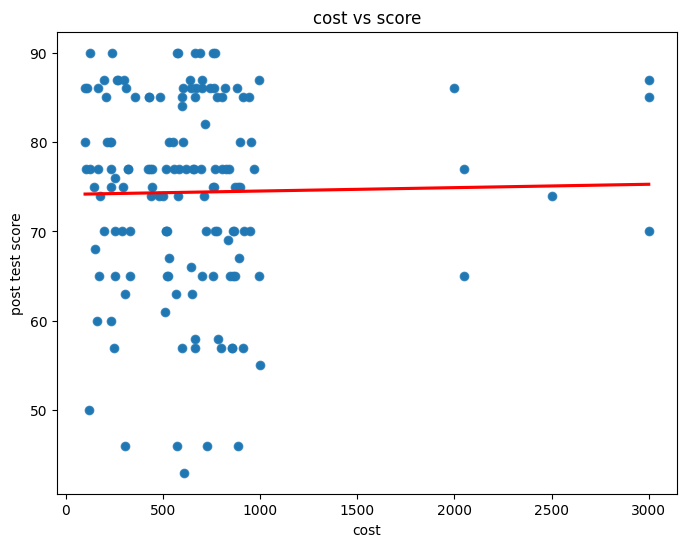

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)                  # for testing purpose use actual dataset columns training cost and post test score values
sns.scatterplot(data=df2, x='Training Cost', y='PostTestScore')
sns.regplot(data=df2, x='Training Cost', y='PostTestScore', ci=None, line_kws={"color": "red"})
plt.title('cost vs score')
plt.xlabel('cost')
plt.ylabel('post test score')
plt.show()

 #### Correlation between training duration and performance growth

In [11]:
correlation_coefficient, p_value = pearsonr(data['Total Training Duration(Days)'], data['Performance Growth'])

print(f"Pearson Correlation between Training Duration and Performance Growth :  {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.2f}")

Pearson Correlation between Training Duration and Performance Growth :  0.1908
P-value: 0.68


####  **Test the statistical significance for duration and performance growth**

In [12]:

if p_value<0.05:
    print("Reject the null hypothesis: There is a statistically significant relationship between training days and performance growth.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant relationship between training days and performance growth.")


print("So we can also determine that training duration does not significantly impact performance growth.\nThere are may be other factors influencing performance growth beyond just the length of training.")

Fail to reject the null hypothesis: There is no statistically significant relationship between training days and performance growth.
So we can also determine that training duration does not significantly impact performance growth.
There are may be other factors influencing performance growth beyond just the length of training.


In [31]:

data['ROI']=(data['Performance Growth'] / data['Total Training Cost'])*1000    #ROI per 1K dollar spend
data['Budget_Used%']=(data['Total Training Cost']/data['Training Budget'])*100


data['Efficiency_Ratio']=data['ROI']/(data['Budget_Used%']/100)  # lowest effidiency ratio-> less impact or costly

print(data[['Training Program Name','Total Training Cost','ROI', 'Budget_Used%','Efficiency_Ratio']])


      Training Program Name  Total Training Cost       ROI  Budget_Used%  \
0      Communication Skills                 9330  0.045016     95.672683   
1          Customer Service                13185  0.032613     97.616051   
2   Database Administration                18600  0.019355    107.763615   
3  Excel - Basic to Advance                11446  0.023589     97.971411   
4    Leadership Development                 8134  0.038112     95.279372   
5        Project Management                18229  0.020297     96.114099   
6          Technical Skills                16144  0.022299     97.294040   

   Efficiency_Ratio  
0          0.047052  
1          0.033409  
2          0.017960  
3          0.024077  
4          0.040000  
5          0.021118  
6          0.022919  


In [32]:
data[['Training Program Name','Total Training Cost','ROI', 'Budget_Used%','Efficiency_Ratio']].round(4)

,Training Program Name,Total Training Cost,ROI,Budget_Used%,Efficiency_Ratio
0,Communication Skills,9330,0.0450,95.6727,0.0471
1,Customer Service,13185,0.0326,97.6161,0.0334
2,Database Administration,18600,0.0194,107.7636,0.0180
3,Excel - Basic to Advance,11446,0.0236,97.9714,0.0241
4,Leadership Development,8134,0.0381,95.2794,0.0400
5,Project Management,18229,0.0203,96.1141,0.0211
6,Technical Skills,16144,0.0223,97.2940,0.0229
